In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression as LR

In [2]:
data = pd.read_csv(r'../datasets/LogisticRegression/rankingcard.csv',index_col=0)

In [3]:
data.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [5]:
data.drop_duplicates(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149391 entries, 1 to 150000
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [9]:
data.index = range(data.shape[0])

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149391 entries, 0 to 149390
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149391 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149391 non-null  float64
 2   age                                   149391 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149391 non-null  int64  
 4   DebtRatio                             149391 non-null  float64
 5   MonthlyIncome                         120170 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149391 non-null  int64  
 7   NumberOfTimes90DaysLate               149391 non-null  int64  
 8   NumberRealEstateLoansOrLines          149391 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149391 non-null  int64  
 10  NumberOfDependents                    145563 non-null  float64
dtype

In [12]:
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.025624
dtype: float64

In [13]:
data['NumberOfDependents'].fillna(int(data['NumberOfDependents'].mean()),inplace=True)

In [14]:
data.isnull().mean()

SeriousDlqin2yrs                        0.000000
RevolvingUtilizationOfUnsecuredLines    0.000000
age                                     0.000000
NumberOfTime30-59DaysPastDueNotWorse    0.000000
DebtRatio                               0.000000
MonthlyIncome                           0.195601
NumberOfOpenCreditLinesAndLoans         0.000000
NumberOfTimes90DaysLate                 0.000000
NumberRealEstateLoansOrLines            0.000000
NumberOfTime60-89DaysPastDueNotWorse    0.000000
NumberOfDependents                      0.000000
dtype: float64

In [15]:
data['SeriousDlqin2yrs'].value_counts()

0    139382
1     10009
Name: SeriousDlqin2yrs, dtype: int64

In [16]:
data['SeriousDlqin2yrs'].value_counts()/data.shape[0]

0    0.933001
1    0.066999
Name: SeriousDlqin2yrs, dtype: float64

In [17]:
#using randomforest to fill the missing values for a column
def fill_missing_rf(x,y,to_fill):
    """ 使用随机森林填补一个特征的缺失值的函数参数：
    X：要填补的特征矩阵
    y：完整的，没有缺失值的标签
    to_fill：字符串，要填补的那一列的名称
    """
    df = x.copy()
    fill = df.loc[:,to_fill]
    df = pd.concat([df.loc[:,df.columns!=to_fill],pd.DataFrame(y)],axis=1)
    #找出训练集和测试集
    y_train = fill[fill.notnull()]
    y_test = fill[fill.isnull()]
    x_train = df.iloc[y_train.index,:]
    x_test = df.iloc[y_test.index,:]
    #用随机森林回归来填补缺失值
    from sklearn.ensemble import RandomForestRegressor as RF
    rfc = RF(n_estimators=100)
    rfc = rfc.fit(x_train,y_train)
    y_predict = rfc.predict(x_test)
    return y_predict

In [18]:
y_predict = fill_missing_rf(data.iloc[:,1:],data.iloc[:,0],'MonthlyIncome')
#fill the missing values MonthlyIncome
data.loc[data['MonthlyIncome'].isnull(),'MonthlyIncome'] = y_predict

In [19]:
data.isnull().mean()

SeriousDlqin2yrs                        0.0
RevolvingUtilizationOfUnsecuredLines    0.0
age                                     0.0
NumberOfTime30-59DaysPastDueNotWorse    0.0
DebtRatio                               0.0
MonthlyIncome                           0.0
NumberOfOpenCreditLinesAndLoans         0.0
NumberOfTimes90DaysLate                 0.0
NumberRealEstateLoansOrLines            0.0
NumberOfTime60-89DaysPastDueNotWorse    0.0
NumberOfDependents                      0.0
dtype: float64

In [21]:
data = data[data.loc[:,'NumberOfTime30-59DaysPastDueNotWorse']<90]
data.index = range(data.shape[0])
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149166 entries, 0 to 149165
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      149166 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  149166 non-null  float64
 2   age                                   149166 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  149166 non-null  int64  
 4   DebtRatio                             149166 non-null  float64
 5   MonthlyIncome                         149166 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       149166 non-null  int64  
 7   NumberOfTimes90DaysLate               149166 non-null  int64  
 8   NumberRealEstateLoansOrLines          149166 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  149166 non-null  int64  
 10  NumberOfDependents                    149166 non-null  float64
dtype

In [22]:
#解决样本不均衡问题
x = data.iloc[:,1:]
y = data.iloc[:,0]
y.value_counts()

0    139293
1      9873
Name: SeriousDlqin2yrs, dtype: int64

In [24]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
x,y = sm.fit_resample(x,y)
y.value_counts()

1    139293
0    139293
Name: SeriousDlqin2yrs, dtype: int64

In [27]:
model_data = pd.read_csv(r'../datasets/LogisticRegression/model_data.csv',index_col=0)
vali_data = pd.read_csv(r'../datasets/LogisticRegression/vali_data.csv',index_col=0)

In [28]:
model_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 195008 entries, 0 to 195007
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      195008 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  195008 non-null  float64
 2   age                                   195008 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  195008 non-null  float64
 4   DebtRatio                             195008 non-null  float64
 5   MonthlyIncome                         195008 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       195008 non-null  float64
 7   NumberOfTimes90DaysLate               195008 non-null  float64
 8   NumberRealEstateLoansOrLines          195008 non-null  float64
 9   NumberOfTime60-89DaysPastDueNotWorse  195008 non-null  float64
 10  NumberOfDependents                    195008 non-null  float64
dtype

In [29]:
vali_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83576 entries, 0 to 83575
Data columns (total 11 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   SeriousDlqin2yrs                      83576 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  83576 non-null  float64
 2   age                                   83576 non-null  float64
 3   NumberOfTime30-59DaysPastDueNotWorse  83576 non-null  float64
 4   DebtRatio                             83576 non-null  float64
 5   MonthlyIncome                         83576 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       83576 non-null  float64
 7   NumberOfTimes90DaysLate               83576 non-null  float64
 8   NumberRealEstateLoansOrLines          83576 non-null  float64
 9   NumberOfTime60-89DaysPastDueNotWorse  83576 non-null  float64
 10  NumberOfDependents                    83576 non-null  float64
dtypes: float64(10),

In [49]:
model_data["qcut"], updown = pd.qcut(model_data["age"], retbins=True, q=20)

In [50]:
updown

array([ 21.        ,  28.        ,  31.02929781,  34.        ,
        36.66351138,  39.        ,  41.        ,  43.        ,
        45.        ,  46.97968823,  48.49720838,  50.00042325,
        52.        ,  54.        ,  56.        ,  58.6589107 ,
        61.        ,  64.        ,  68.        ,  74.        ,
       107.        ])

In [88]:
model_data

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents,qcut
0,0,0.015404,53.000000,0.000000,0.121802,4728.000000,5.000000,0.000000,0.000000,0.0,0.000000,"(52.0, 54.0]"
1,0,0.168311,63.000000,0.000000,0.141964,1119.000000,5.000000,0.000000,0.000000,0.0,0.000000,"(61.0, 64.0]"
2,1,1.063570,39.716057,1.141971,0.417663,3500.000000,5.141971,1.000000,0.141971,2.0,3.716057,"(39.0, 41.0]"
3,0,0.088684,73.000000,0.000000,0.522822,5301.000000,11.000000,0.000000,2.000000,0.0,0.000000,"(68.0, 74.0]"
4,1,0.622999,53.636002,0.000000,0.423650,13000.000000,9.819992,0.000000,2.000000,0.0,0.181999,"(52.0, 54.0]"
...,...,...,...,...,...,...,...,...,...,...,...,...
195003,1,0.916269,32.033170,2.966830,0.548132,6000.000000,10.988943,0.988943,1.000000,0.0,3.966830,"(31.029, 34.0]"
195004,1,0.484728,50.000000,1.000000,0.370603,5258.000000,12.000000,0.000000,1.000000,0.0,2.000000,"(48.497, 50.0]"
195005,1,0.850447,46.000000,0.922931,0.562610,8000.000000,9.462415,0.000000,1.922931,0.0,2.768793,"(45.0, 46.98]"
195006,0,1.000000,64.000000,0.000000,0.364694,10309.000000,7.000000,0.000000,3.000000,0.0,0.000000,"(61.0, 64.0]"


In [152]:
coount_y0 = model_data[model_data["SeriousDlqin2yrs"] == 0].groupby("qcut").count()['SeriousDlqin2yrs']

In [153]:
coount_y1 = model_data[model_data["SeriousDlqin2yrs"] == 1].groupby("qcut").count()['SeriousDlqin2yrs']

In [154]:
coount_y0

qcut
(20.999, 28.0]     4243
(28.0, 31.029]     3571
(31.029, 34.0]     4075
(34.0, 36.664]     2908
(36.664, 39.0]     5182
(39.0, 41.0]       3956
(41.0, 43.0]       4002
(43.0, 45.0]       4389
(45.0, 46.98]      2419
(46.98, 48.497]    4813
(48.497, 50.0]     4900
(50.0, 52.0]       4728
(52.0, 54.0]       4681
(54.0, 56.0]       4677
(56.0, 58.659]     4483
(58.659, 61.0]     6583
(61.0, 64.0]       6968
(64.0, 68.0]       6623
(68.0, 74.0]       6753
(74.0, 107.0]      7737
Name: SeriousDlqin2yrs, dtype: int64

In [192]:
num_bins = [*zip(updown,updown[1:],coount_y0,coount_y1)]

In [193]:
num_bins

[(21.0, 28.0, 4243, 6048),
 (28.0, 31.02929781247966, 3571, 5639),
 (31.02929781247966, 34.0, 4075, 6644),
 (34.0, 36.66351137569308, 2908, 5874),
 (36.66351137569308, 39.0, 5182, 5789),
 (39.0, 41.0, 3956, 5550),
 (41.0, 43.0, 4002, 5787),
 (43.0, 45.0, 4389, 5765),
 (45.0, 46.979688234497225, 2419, 5913),
 (46.979688234497225, 48.49720837966598, 4813, 4937),
 (48.49720837966598, 50.00042324524287, 4900, 4850),
 (50.00042324524287, 52.0, 4728, 5959),
 (52.0, 54.0, 4681, 5428),
 (54.0, 56.0, 4677, 4489),
 (56.0, 58.65891069807988, 4483, 4557),
 (58.65891069807988, 61.0, 6583, 4004),
 (61.0, 64.0, 6968, 3749),
 (64.0, 68.0, 6623, 2677),
 (68.0, 74.0, 6753, 2107),
 (74.0, 107.0, 7737, 1551)]

In [181]:
for i in range(20):
    if 0 in num_bins[0][2:]:
        num_bins[0:2] = [(num_bins[0][0], num_bins[1][1], num_bins[0][2]+num_bins[1][2], num_bins[0][3]+num_bins[1][3])]
        continue
    for i in range(len(num_bins)):
        if 0 in num_bins[i][2:]:
            num_bins[i-1:i+1] = [(num_bins[i-1][0], num_bins[i][1], num_bins[i-1][2]+num_bins[i][2],num_bins[i-1][3]+num_bins[i][3])]
        break
    else:
        break

In [160]:
%whos

Variable                        Type         Data/Info
------------------------------------------------------
DataFrame                       type         <class 'pandas.core.frame.DataFrame'>
LR                              type         <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
MultiIndex                      type         <class 'pandas.core.indexes.multi.MultiIndex'>
SMOTE                           ABCMeta      <class 'imblearn.over_sam<...>pling._smote.base.SMOTE'>
coount_y0                       Series       qcut\n(20.999, 28.0]     <...>usDlqin2yrs, dtype: int64
coount_y1                       Series       qcut\n(20.999, 28.0]     <...>usDlqin2yrs, dtype: int64
data                            DataFrame            SeriousDlqin2yrs <...>149166 rows x 11 columns]
fill_missing_rf                 function     <function fill_missing_rf at 0x7f8d385cb130>
i                               int          19
model_data                      DataFrame            SeriousDlqin2yrs <.

In [194]:
len(num_bins)

20

In [183]:
model_data.groupby("qcut")[["SeriousDlqin2yrs"]].count()

,SeriousDlqin2yrs
qcut,
"(20.999, 28.0]",10291
"(28.0, 31.029]",9210
"(31.029, 34.0]",10719
"(34.0, 36.664]",8782
"(36.664, 39.0]",10971
"(39.0, 41.0]",9506
"(41.0, 43.0]",9789
"(43.0, 45.0]",10154
"(45.0, 46.98]",8332


In [184]:
model_data.groupby("qcut")[["SeriousDlqin2yrs"]].value_counts()

qcut             SeriousDlqin2yrs
(20.999, 28.0]   1                   6048
                 0                   4243
(28.0, 31.029]   1                   5639
                 0                   3571
(31.029, 34.0]   1                   6644
                 0                   4075
(34.0, 36.664]   1                   5874
                 0                   2908
(36.664, 39.0]   1                   5789
                 0                   5182
(39.0, 41.0]     1                   5550
                 0                   3956
(41.0, 43.0]     1                   5787
                 0                   4002
(43.0, 45.0]     1                   5765
                 0                   4389
(45.0, 46.98]    1                   5913
                 0                   2419
(46.98, 48.497]  1                   4937
                 0                   4813
(48.497, 50.0]   0                   4900
                 1                   4850
(50.0, 52.0]     1                   5959


In [195]:
#定义woe和IV函数
def get_woe(num_bins):
    columns = ['min','max','count_0','count_1']
    df = pd.DataFrame(num_bins,columns=columns)
    df['total'] = df['count_0']+df['count_1']
    df['percentage'] = df['total']/df['total'].sum()
    df['bad_rate'] = df['count_1']/df['total']
    df['good%'] = df['count_0']/df['count_0'].sum()
    df['bad%'] = df['count_1']/df['count_1'].sum()
    df['woe'] = np.log(df['count_0']/df['count_1'])
    return df
def get_iv(df):
    rate = df['good%']-df['bad%']
    iv = np.sum((rate)*df.woe)
    return iv

In [196]:
num_bins_ = num_bins.copy()

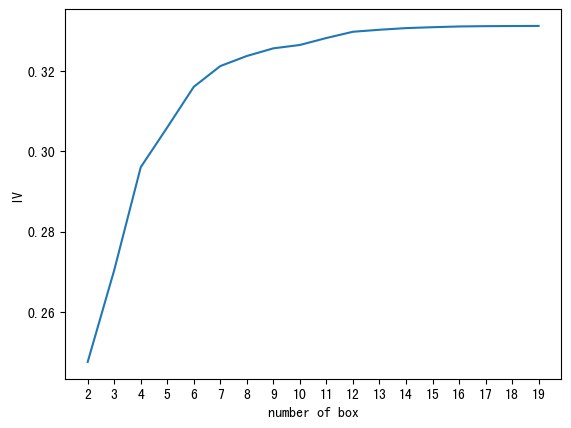

In [197]:
import matplotlib.pyplot as plt
import scipy
IV = []
axisx = []
while len(num_bins_)>2:
    pvs = []
    for i in range(len(num_bins_)-1):
        x1 = num_bins_[i][2:]
        x2 = num_bins_[i+1][2:]
        pv = scipy.stats.chi2_contingency([x1,x2])[1]
        pvs.append(pv)
    i = pvs.index(max(pvs))
    num_bins_[i:i+2] = [(num_bins_[i][0],num_bins_[i+1][1],num_bins_[i][2]+num_bins_[i+1][2],num_bins_[i][3]+num_bins_[i+1][3])]
    axisx.append(len(num_bins_))
    IV.append(get_iv(get_woe(num_bins_)))
plt.figure()
plt.plot(axisx,IV)
plt.xticks(axisx)
plt.xlabel('number of box')
plt.ylabel('IV')
plt.show()

In [199]:
num_bins_

[(21.0, 58.65891069807988, 63027, 83229),
 (58.65891069807988, 107.0, 34664, 14088)]

In [200]:
IV

[0.33118708202334224,
 0.33116108258644655,
 0.331129233260653,
 0.3310523456369513,
 0.33086728994238107,
 0.33064206774364135,
 0.3302316066756687,
 0.32973264373260497,
 0.3281790214989657,
 0.326447580017967,
 0.3256050079270064,
 0.3237043222913992,
 0.3211948361857016,
 0.31603561586087286,
 0.3059338178876779,
 0.2960219391369412,
 0.2703916085306449,
 0.2475477016912863]

In [201]:
def get_bin(num_bins_,n):
    while len(num_bins_)>n:
        pvs = []
        for i in range(len(num_bins_)-1):
            x1 = num_bins_[i][2:]
            x2 = num_bins_[i+1][2:]
            pv = scipy.stats.chi2_contingency([x1,x2])[1]
            pvs.append(pv)
        i = pvs.index(max(pvs))
        num_bins_[i:i+2] = [(num_bins_[i][0],num_bins_[i+1][1],num_bins_[i][2]+num_bins_[i+1][2],num_bins_[i][3]+num_bins_[i+1][3])]
    return num_bins_

In [204]:
afterbins = get_bin(num_bins,6)

In [205]:
afterbins

[(21.0, 45.0, 32326, 47096),
 (45.0, 46.979688234497225, 2419, 5913),
 (46.979688234497225, 58.65891069807988, 28282, 30220),
 (58.65891069807988, 64.0, 13551, 7753),
 (64.0, 74.0, 13376, 4784),
 (74.0, 107.0, 7737, 1551)]

In [206]:
bins_df = get_woe(afterbins)

In [207]:
bins_df

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,21.000000,45.000000,32326,47096,79422,0.407276,0.592984,0.330900,0.483944,-0.376316
1,45.000000,46.979688,2419,5913,8332,0.042726,0.709674,0.024762,0.060760,-0.893799
2,46.979688,58.658911,28282,30220,58502,0.299998,0.516564,0.289505,0.310532,-0.066278
3,58.658911,64.000000,13551,7753,21304,0.109247,0.363922,0.138713,0.079667,0.558380
4,64.000000,74.000000,13376,4784,18160,0.093124,0.263436,0.136922,0.049159,1.028185
5,74.000000,107.000000,7737,1551,9288,0.047629,0.166990,0.079199,0.015938,1.607114


In [208]:
bins_df['woe'].to_dict()

{0: -0.37631621173834323,
 1: -0.8937990852108026,
 2: -0.06627839695900875,
 3: 0.5583804801037549,
 4: 1.028185039694015,
 5: 1.6071141313729158}

In [256]:
def graphforbestbin(DF,X,Y,n=5,q=20,graph=True):
    """ 自动最优分箱函数，基于卡方检验的分箱
    参数:
    DF: 需要输入的数据
    X: 需要分箱的列名
    Y: 分箱数据对应的标签 Y 列名
    n: 保留分箱个数
    q: 初始分箱的个数
    graph: 是否要画出IV图像
    区间为前开后闭 (]
    """
    DF = DF[[X,Y]].copy()

    DF["qcut"],bins = pd.qcut(DF[X],retbins=True,q=q,duplicates='drop') #等频分箱
    coount_y0 = DF.loc[DF[Y]==0].groupby(by='qcut').count()[Y]
    coount_y1 = DF.loc[DF[Y]==1].groupby(by='qcut').count()[Y]
    num_bins = [*zip(bins,bins[1:],coount_y0,coount_y1)]

    for i in range(q):
        if 0 in num_bins[0][2:]:
            num_bins[0:2] = [(
                num_bins[0][0],
                num_bins[1][1],
                num_bins[0][2]+num_bins[1][2],
                num_bins[0][3]+num_bins[1][3])]
            continue

        for i in range(len(num_bins)):
            if 0 in num_bins[i][2:]:
                num_bins[i-1:i+1] = [(num_bins[i-1][0],num_bins[i][1],num_bins[i-1][2]+num_bins[i][2],num_bins[i-1][3]+num_bins[i][3])]
                break
        else:
            break


    def get_woe(num_bins):
        columns = ['min','max','count_0','count_1']
        df = pd.DataFrame(num_bins,columns=columns)
        df['total'] = df['count_0']+df['count_1']
        df['percentage'] = df['total']/df['total'].sum()
        df['bad_rate'] = df['count_1']/df['total']
        df['good%'] = df['count_0']/df['count_0'].sum()
        df['bad%'] = df['count_1']/df['count_1'].sum()
        df['woe'] = np.log(df['count_0']/df['count_1'])
        return df
    def get_iv(df):
        rate = df['good%']-df['bad%']
        iv = np.sum((rate)*df.woe)
        return iv
    def get_bin(num_bins_,n):
        IV = []
        axisx = []
        while len(num_bins_)>n:
            pvs = []
            for i in range(len(num_bins_)-1):
                x1 = num_bins_[i][2:]
                x2 = num_bins_[i+1][2:]
                pv = scipy.stats.chi2_contingency([x1,x2])[1]
                pvs.append(pv)
            i = pvs.index(max(pvs))
            num_bins_[i:i+2] = [(num_bins_[i][0],num_bins_[i+1][1],num_bins_[i][2]+num_bins_[i+1][2],num_bins_[i][3]+num_bins_[i+1][3])]

            bins_df = get_woe(num_bins_)
            axisx.append(len(num_bins_))
            IV.append(get_iv(bins_df))
        if graph:
            plt.figure()
            plt.plot(axisx,IV)
            plt.xticks(axisx)
            plt.xlabel('number of box')
            plt.ylabel('IV')
            plt.show()
        return bins_df

    return get_bin(num_bins,n)


In [234]:
%whos

Variable                        Type         Data/Info
------------------------------------------------------
DataFrame                       type         <class 'pandas.core.frame.DataFrame'>
IV                              list         n=18
LR                              type         <class 'sklearn.linear_mo<...>stic.LogisticRegression'>
MultiIndex                      type         <class 'pandas.core.indexes.multi.MultiIndex'>
SMOTE                           ABCMeta      <class 'imblearn.over_sam<...>pling._smote.base.SMOTE'>
afterbins                       list         n=6
axisx                           list         n=18
coount_y0                       Series       qcut\n(20.999, 28.0]     <...>usDlqin2yrs, dtype: int64
coount_y1                       Series       qcut\n(20.999, 28.0]     <...>usDlqin2yrs, dtype: int64
data                            DataFrame            SeriousDlqin2yrs <...>149166 rows x 11 columns]
fill_missing_rf                 function     <function fill_m

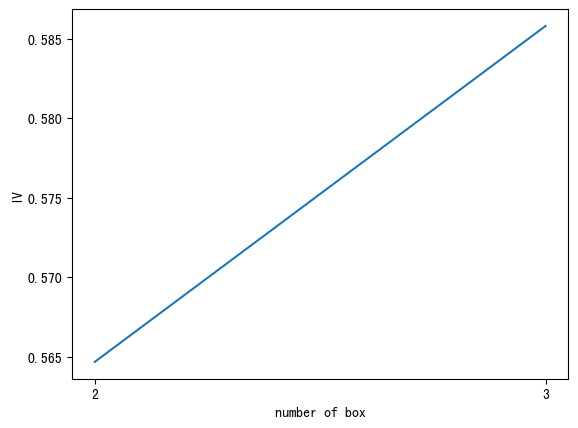

,min,max,count_0,count_1,total,percentage,bad_rate,good%,bad%,woe
0,0.000000,0.773433,84452,52053,136505,0.699997,0.381327,0.864481,0.534881,0.483921
1,0.773433,13.000000,13239,45264,58503,0.300003,0.773704,0.135519,0.465119,-1.229345


In [257]:
graphforbestbin(model_data,'NumberOfTime30-59DaysPastDueNotWorse','SeriousDlqin2yrs',graph=True,n=2)

RevolvingUtilizationOfUnsecuredLines


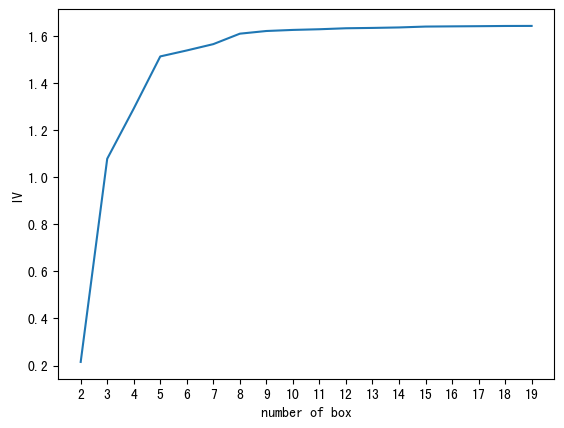

age


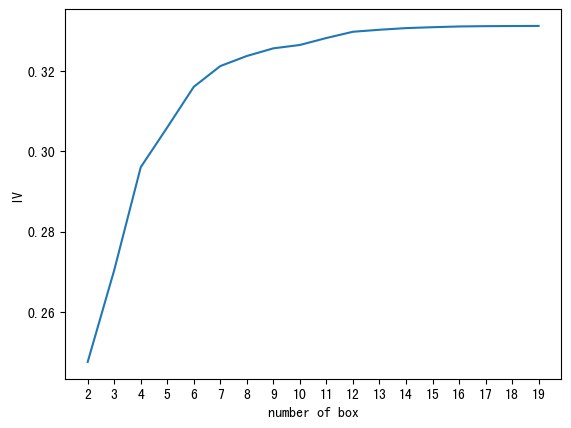

NumberOfTime30-59DaysPastDueNotWorse


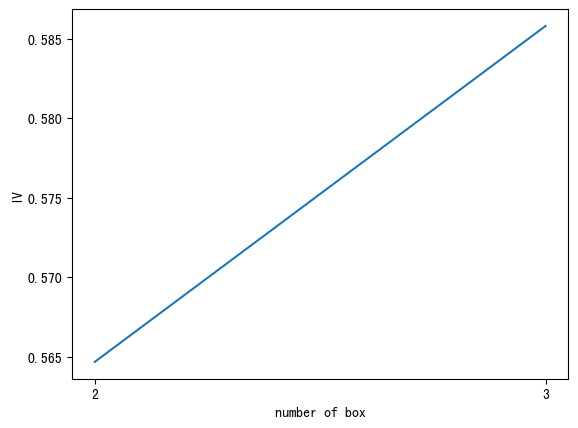

DebtRatio


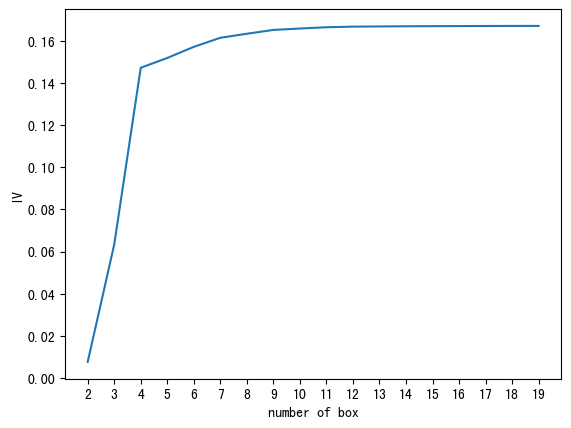

MonthlyIncome


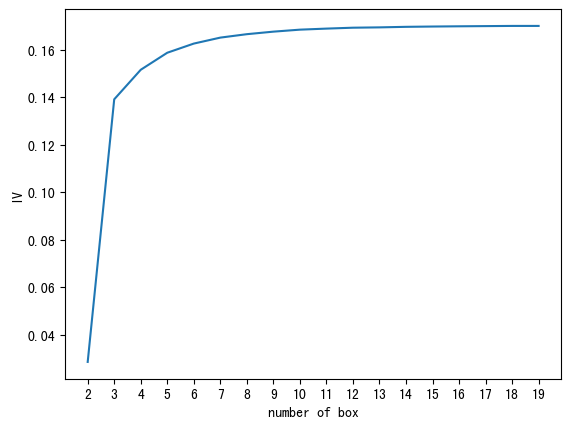

NumberOfOpenCreditLinesAndLoans


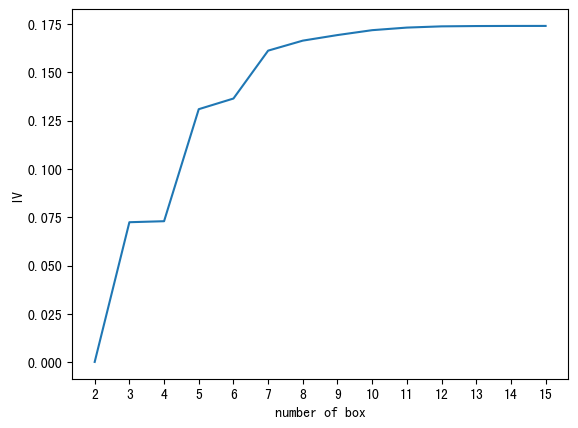

NumberOfTimes90DaysLate


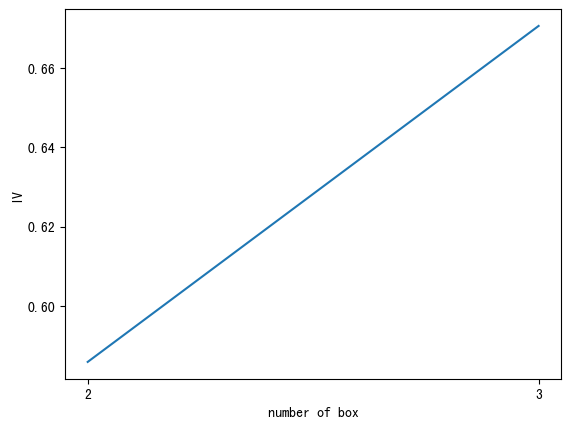

NumberRealEstateLoansOrLines


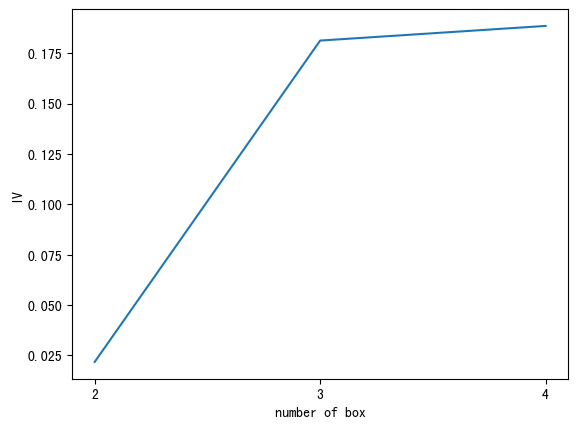

NumberOfTime60-89DaysPastDueNotWorse


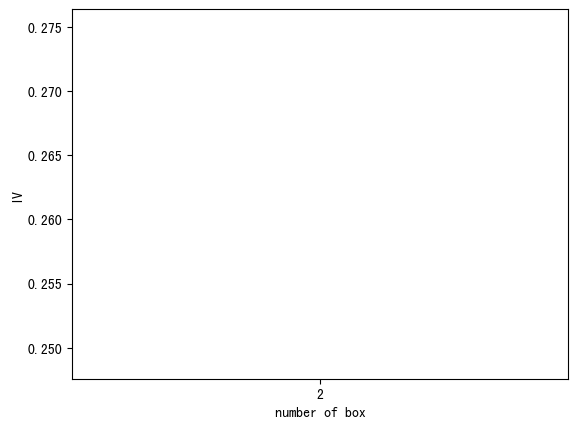

NumberOfDependents


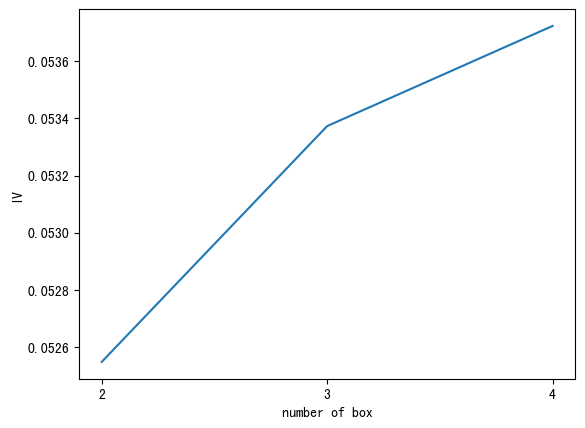

In [258]:
for i in model_data.columns[1:-1]:
    print(i)
    graphforbestbin(model_data,i,'SeriousDlqin2yrs',n=2)

In [261]:
auto_col_bins = {"RevolvingUtilizationOfUnsecuredLines":6,
                "age":5,
                "DebtRatio":4,
                "MonthlyIncome":3,
                "NumberOfOpenCreditLinesAndLoans":5}

#不能使用自动分箱的变量
hand_bins = {"NumberOfTime30-59DaysPastDueNotWorse":[0,1,2,13]
            ,"NumberOfTimes90DaysLate":[0,1,2,17]
            ,"NumberRealEstateLoansOrLines":[0,1,2,4,54]
            ,"NumberOfTime60-89DaysPastDueNotWorse":[0,1,2,8]
            ,"NumberOfDependents":[0,1,2,3]}

#保证区间覆盖使用 np.inf替换最大值，用-np.inf替换最小值
#原因：比如一些新的值出现，例如家庭人数为30，以前没出现过，改成范围为极大值之后，这些新值就都能分到箱里边了
hand_bins = {k:[-np.inf,*v[:-1],np.inf] for k,v in hand_bins.items()}

In [265]:
bins_of_col = {}
for col in auto_col_bins:
    bins_df = graphforbestbin(model_data,col,'SeriousDlqin2yrs',n=auto_col_bins[col],graph=False)
    bins_list = sorted(set(bins_df["min"]).union(bins_df["max"]))
    bins_list[0],bins_list[-1] = -np.inf,np.inf
    bins_of_col[col] = bins_list

In [267]:
print(bins_of_col)

{'RevolvingUtilizationOfUnsecuredLines': [-inf, 0.09901726399999998, 0.29808732961143186, 0.4651728375837142, 0.9825500857299035, 0.9999999, inf], 'age': [-inf, 45.0, 46.979688234497225, 58.65891069807988, 64.0, inf], 'DebtRatio': [-inf, 0.017423036018720146, 0.40162367826303513, 1.4772797107095932, inf], 'MonthlyIncome': [-inf, 0.1, 5595.922526737865, inf], 'NumberOfOpenCreditLinesAndLoans': [-inf, 4.696767299826023, 5.0, 8.890720195471804, 9.082278444966049, inf]}


In [268]:
bins_of_col.update(hand_bins)

In [269]:
bins_of_col

{'RevolvingUtilizationOfUnsecuredLines': [-inf,
  0.09901726399999998,
  0.29808732961143186,
  0.4651728375837142,
  0.9825500857299035,
  0.9999999,
  inf],
 'age': [-inf, 45.0, 46.979688234497225, 58.65891069807988, 64.0, inf],
 'DebtRatio': [-inf,
  0.017423036018720146,
  0.40162367826303513,
  1.4772797107095932,
  inf],
 'MonthlyIncome': [-inf, 0.1, 5595.922526737865, inf],
 'NumberOfOpenCreditLinesAndLoans': [-inf,
  4.696767299826023,
  5.0,
  8.890720195471804,
  9.082278444966049,
  inf],
 'NumberOfTime30-59DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfTimes90DaysLate': [-inf, 0, 1, 2, inf],
 'NumberRealEstateLoansOrLines': [-inf, 0, 1, 2, 4, inf],
 'NumberOfTime60-89DaysPastDueNotWorse': [-inf, 0, 1, 2, inf],
 'NumberOfDependents': [-inf, 0, 1, 2, inf]}